In [7]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import learning_curve,validation_curve,cross_val_predict
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder ,PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import missingno as mos
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression, mutual_info_regression
from joblib import dump, load

In [4]:
url="https://raw.githubusercontent.com/digipodium/Datasets/main/regression/dataA.csv"
df=pd.read_csv(url)
df

,x,y,z
0,81.997014,99.017636,a
1,41.724756,73.680872,a
2,26.566336,70.189922,a
3,124.561476,12.295715,a
4,142.729102,46.652237,a
...,...,...,...
178,450.746577,322.478336,a
179,411.621174,322.344057,a
180,421.518437,334.330992,a
181,432.723531,296.987125,a


In [6]:
X=df[['x']]
y=df['y']
Xtrain, Xtest, ytrain, ytest=train_test_split(X,y,test_size=0.2,random_state=42)

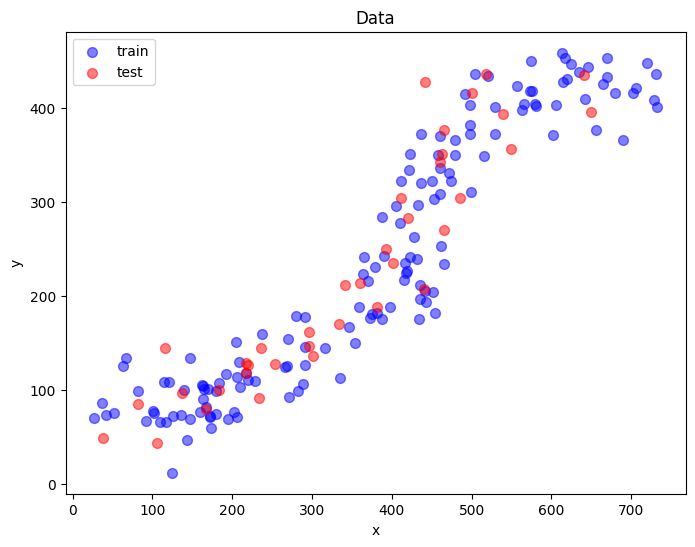

In [10]:
fig, ax = plt.subplots(figsize = (8,6))
ax.scatter(Xtrain, ytrain, label = 'train', color = 'blue', alpha = .5, s = 50)
ax.scatter(Xtest, ytest, label = 'test', color = 'red', alpha = .5, s = 50)
ax.legend()
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Data')
plt.show()

VALIDATION

In [16]:
#polynomial linear regression - validation curve
train_scores, test_scores = validation_curve(
    Pipeline([('poly', PolynomialFeatures()), ('linear', LinearRegression())]),
    Xtrain,
    ytrain, 
    param_name='poly__degree',
    param_range=range(1,20),
    cv = 5)

VISUALIZATION

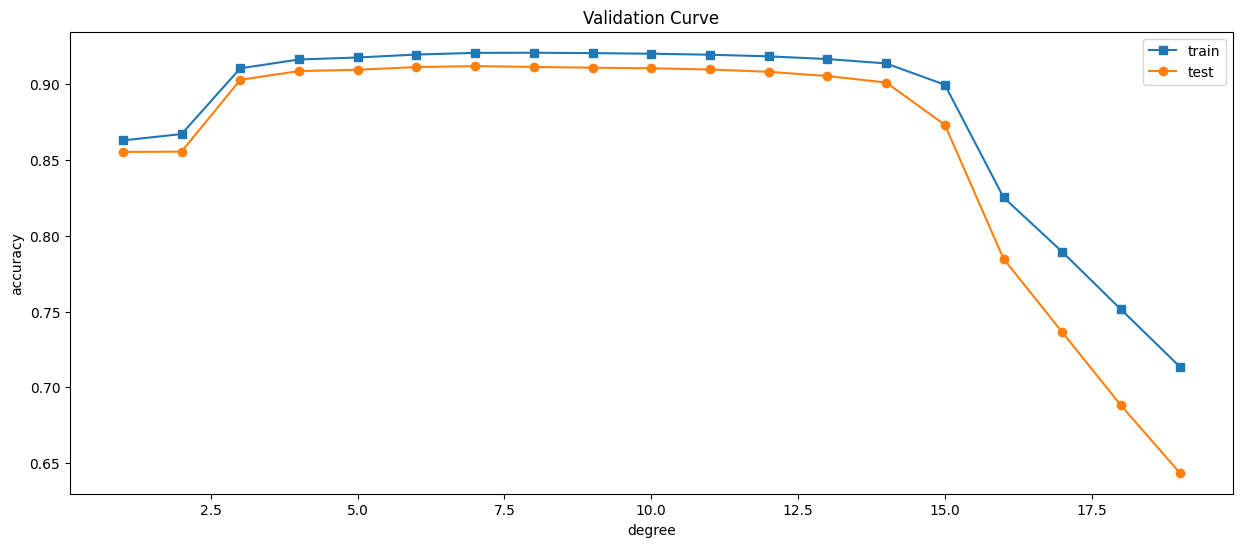

In [17]:
fig, ax = plt.subplots(figsize = (15,6))
ax.plot(range(1, 20), np.mean(train_scores, axis = 1), label = 'train', marker = 's')
ax.plot(range(1, 20), np.mean(test_scores, axis = 1), label = 'test', marker = 'o')
ax.legend()
ax.set_xlabel('degree')
ax.set_ylabel('accuracy')
ax.set_title('Validation Curve')
plt.show()

Learing Curve

In [19]:
train_sizes, train_scores, test_scores = learning_curve(
    Pipeline([('poly', PolynomialFeatures(degree = 5)), ('linear', LinearRegression())]),
    X, 
    y, 
    train_sizes = np.linspace(.1, 1, 10), 
    cv = 5
)

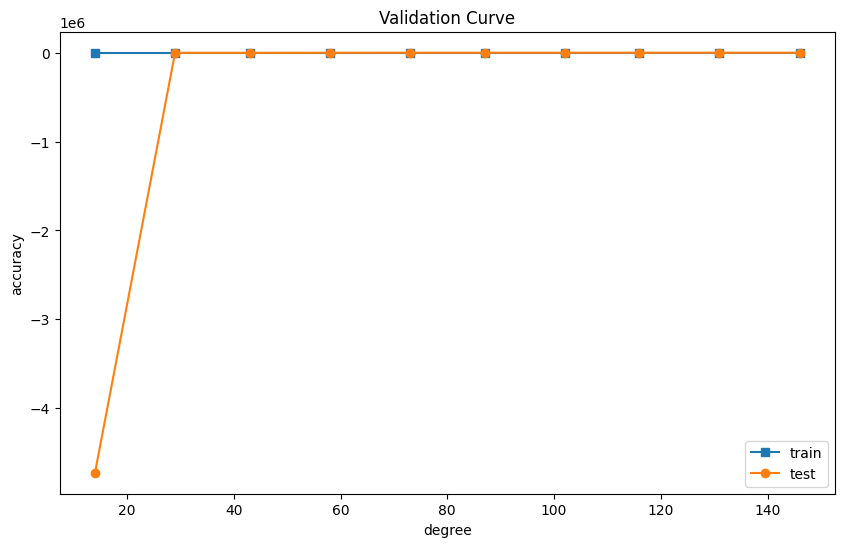

In [20]:
fig, ax = plt.subplots(figsize = (10,6))
ax.plot(train_sizes, np.mean(train_scores, axis = 1), label = 'train', marker = 's')
ax.plot(train_sizes, np.mean(test_scores, axis = 1), label = 'test', marker = 'o')
ax.legend()
ax.set_xlabel('degree')
ax.set_ylabel('accuracy')
ax.set_title('Validation Curve')
plt.show()